In [1]:
from main_simple_lib import *

config.json:   0%|          | 0.00/4.46k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

2024-04-06 22:55:25.073949: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-06 22:55:25.500903: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-06 22:55:27.725050: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-04-06 22:55:27.725145: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [3]:
import pickle
import json
import numpy as np

Reading the PVQA test dataset

In [7]:
pvqa_test_qas_file = "/data/mn27889/pvqa/qas/test/test_qa.pkl"

with open(pvqa_test_qas_file, 'rb') as file:
    pvqa_test_qa = pickle.load(file)

In [15]:
pvqa_qas_closed = [qas for qas in pvqa_test_qa if qas['answer'] == 'yes' or qas['answer'] == 'no']
pvqa_ques_closed = [qas['question'] for qas in pvqa_qas_closed]
pvqa_ans_closed = [qas['answer'] for qas in pvqa_qas_closed]
pvqa_img_closed = ['/data/mn27889/pvqa/images/test/' + qas['image'] + '.jpg' for qas in pvqa_qas_closed]

In [16]:
# pvqa_qas_open = [qas for qas in pvqa_test_qa if qas['answer'] != 'yes' and qas['answer'] != 'no']
# pvqa_ques_open = [qas['question'] for qas in pvqa_qas_open]
# pvqa_ans_open = [qas['answer'] for qas in pvqa_qas_open]
# pvqa_img_open = ['/data/mn27889/pvqa/images/test/' + qas['image'] + '.jpg' for qas in pvqa_qas_open]

In [28]:
idx = 10
ques = pvqa_ques_closed[idx]
img = load_image(pvqa_img_closed[idx])

In [29]:
ques

'Does the wall of the artery show a circumferential bright pink area of necrosis with protein deposition and inflammation?'

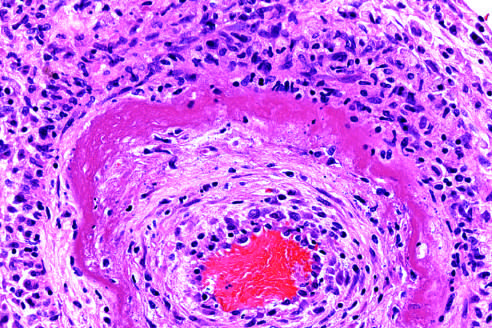

In [30]:
img

In [31]:
query = ques
code = get_code(query)

  0 def execute_command(image):                                                                                    
  1     image_patch = ImagePatch(image)                                                                            
  2     artery_patches = image_patch.find_plip("artery wall")                                                      
  3     for artery_patch in artery_patches:                                                                        
  4         if artery_patch.verify_property_plip("artery wall", "circumferential bright pink area") and \          
  5            artery_patch.verify_property_plip("artery wall", "necrosis") and \                                  
  6            artery_patch.verify_property_plip("artery wall", "protein deposition") and \                        
  7            artery_patch.verify_property_plip("artery wall", "inflammation"):                                   
  8             return "Yes"                                                                                       
  9     return "No"                                                                                                

Output()

───────────────────────────────────────────────────── Line 1 ──────────────────────────────────────────────────────

image_patch =

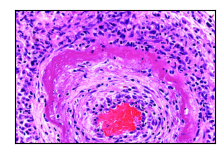

───────────────────────────────────────────────────── Line 2 ──────────────────────────────────────────────────────

artery_patches[0] =

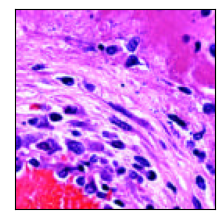

───────────────────────────────────────────────────── Line 3 ──────────────────────────────────────────────────────

artery_patch =

───────────────────────────────────────────────────── Line 4 ──────────────────────────────────────────────────────

artery_patch.verify_property_plip('artery wall', 'circumferential bright pink area') and 
artery_patch.verify_property_plip('artery wall', 'necrosis') and artery_patch.verify_property_plip('artery wall', 
'protein deposition') and artery_patch.verify_property_plip('artery wall', 'inflammation') = True

───────────────────────────────────────────────────── Line 5 ──────────────────────────────────────────────────────

"Yes" = Yes

────────────────────────────────────────────────── Final Result ───────────────────────────────────────────────────

Result = Yes

'Yes'

In [32]:
execute_code(code, img, show_intermediate_steps=True)